------------------------------------
# Bussiness Objective

# Prepare a prediction model for whether the client has subscribed a term deposit or not.

-----------------------------------------------------------------------------------------

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline 
import warnings 
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (20, 15)
plt.rcParams['figure.dpi'] = 350

In [2]:
df = pd.read_csv(r"C:\Users\sandi\Documents\GitHub\Assignments\Assignment_06_Logistic Regression\Dataset\bank-full.csv",sep=";")

In [3]:
df.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no

In [4]:
df.shape

(45211, 17)

# EDA

In [5]:
df.describe()

age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       -1.000000      0.000000  
max      871.000000    275.000000

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [7]:
df.isna().sum()


age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
y               2
dtype: int64

<AxesSubplot:xlabel='age'>

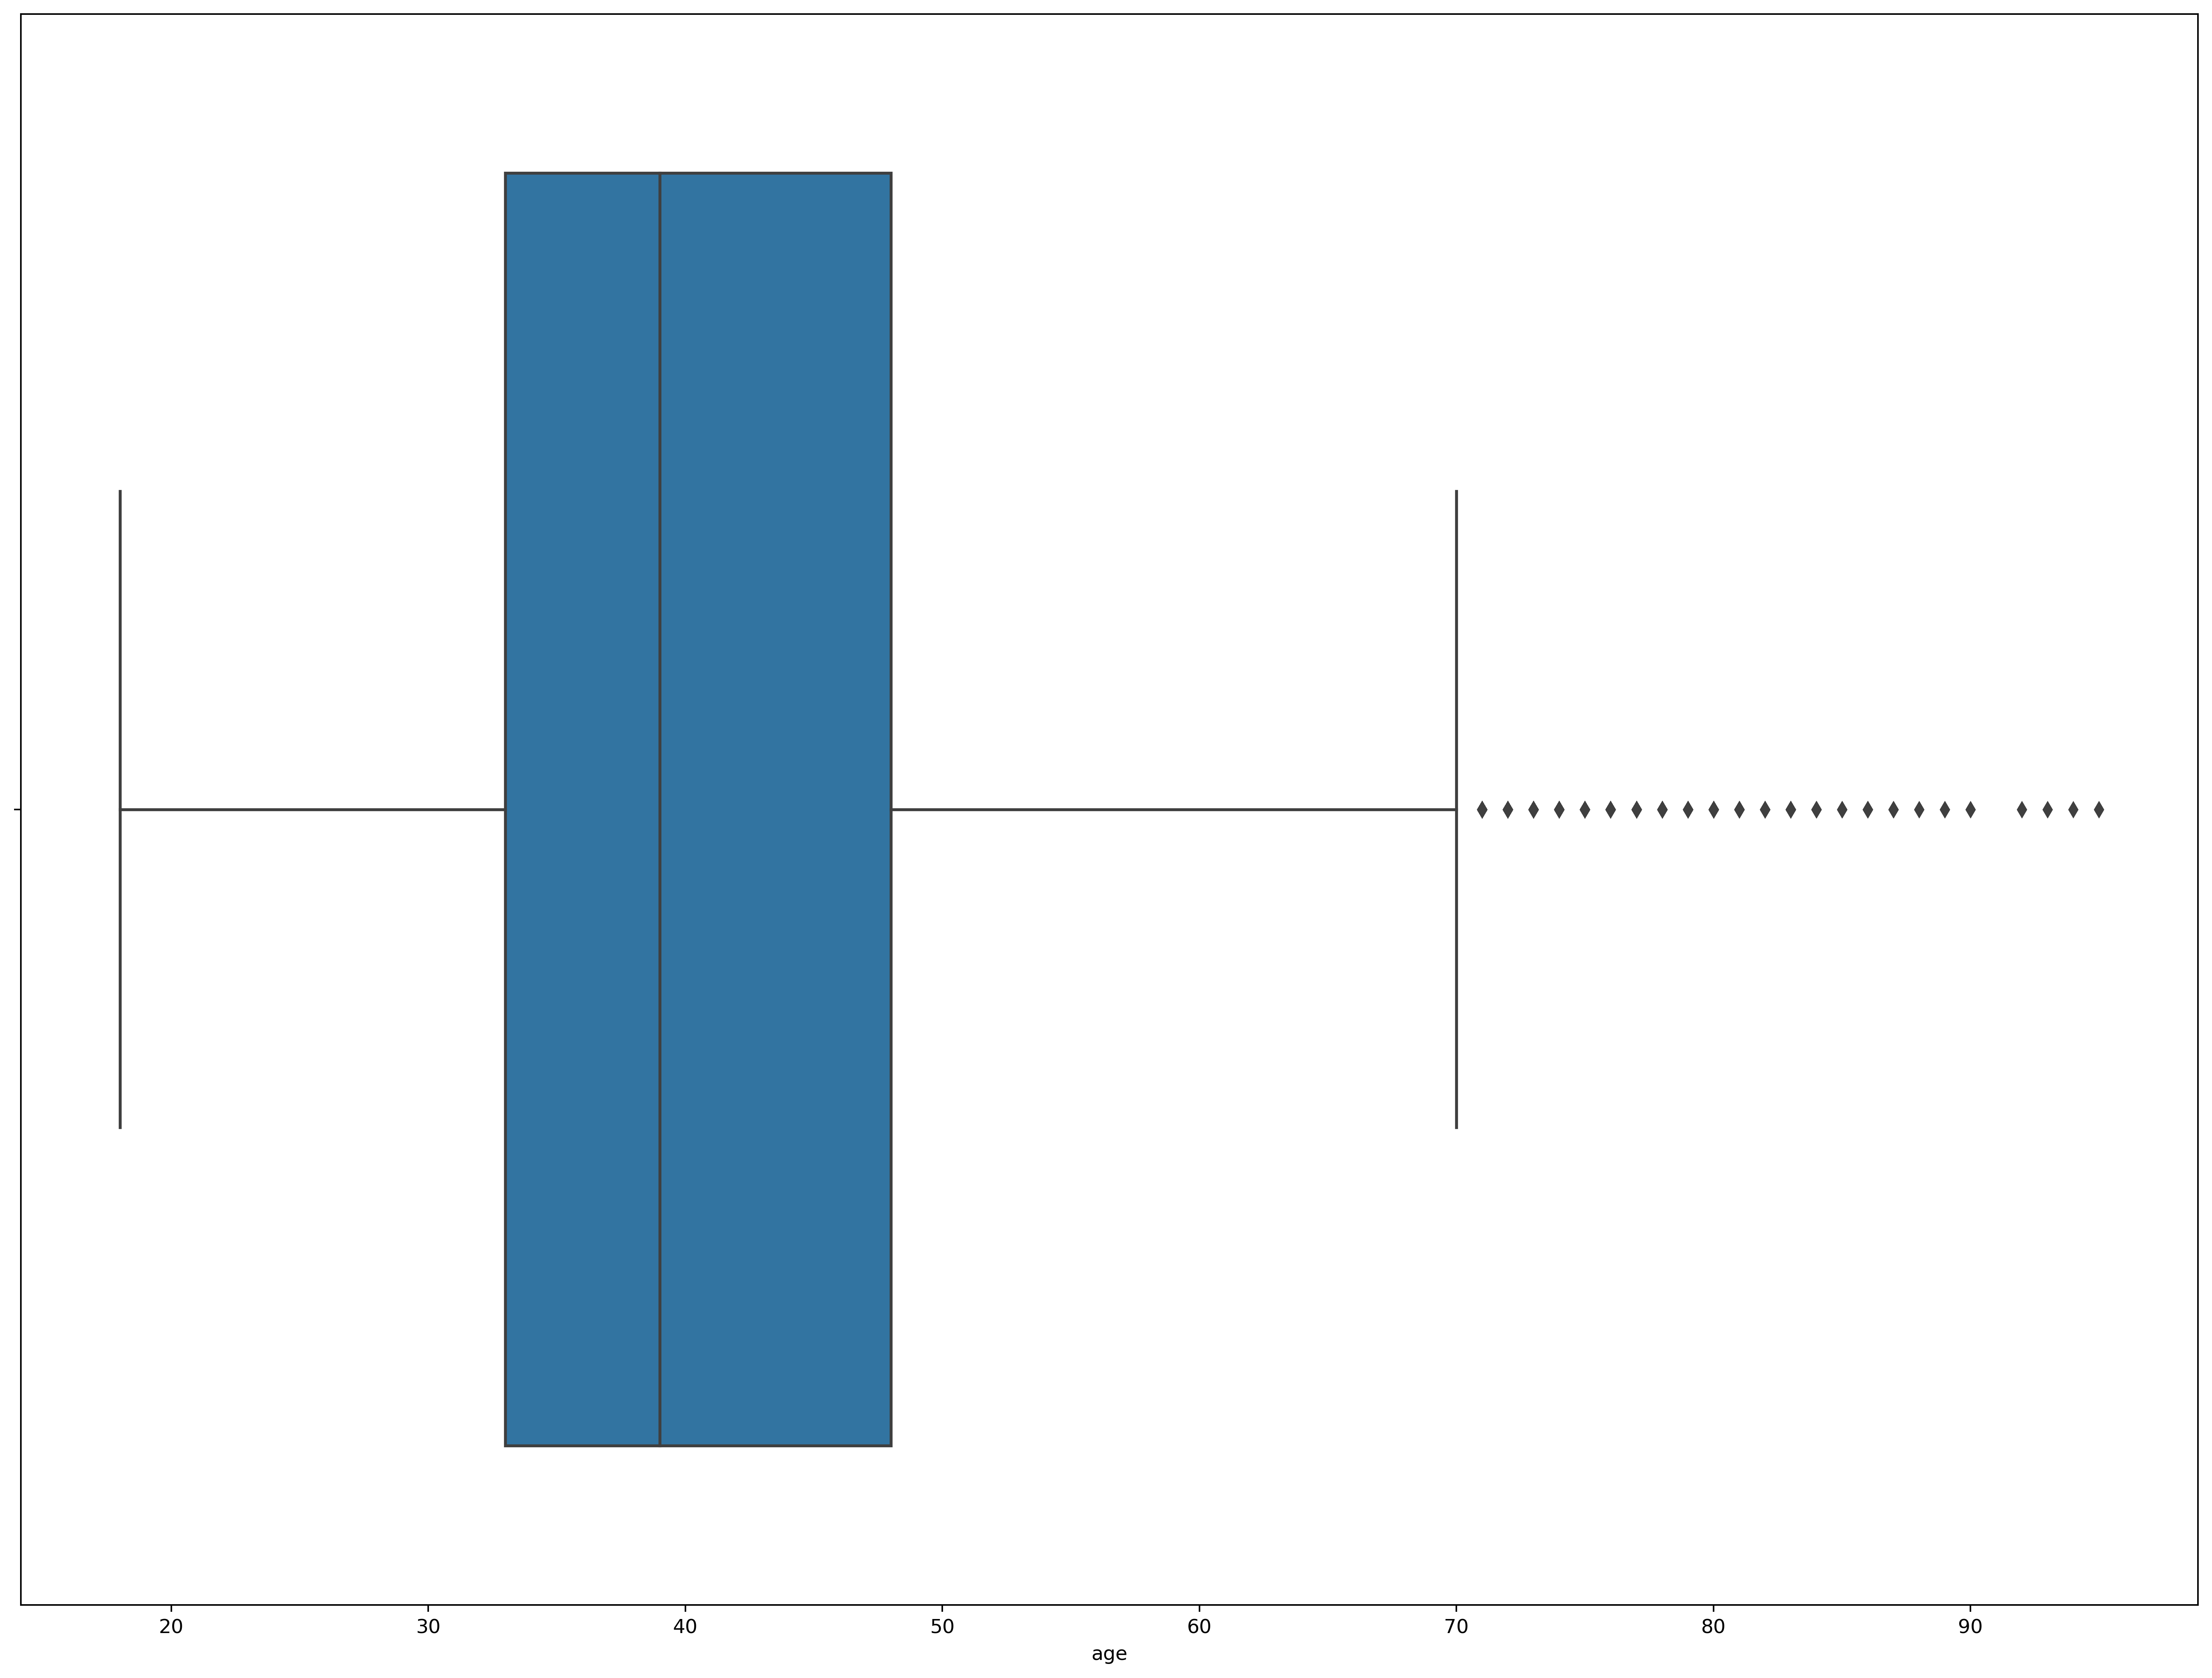

In [10]:
sns.boxplot(df['age'])

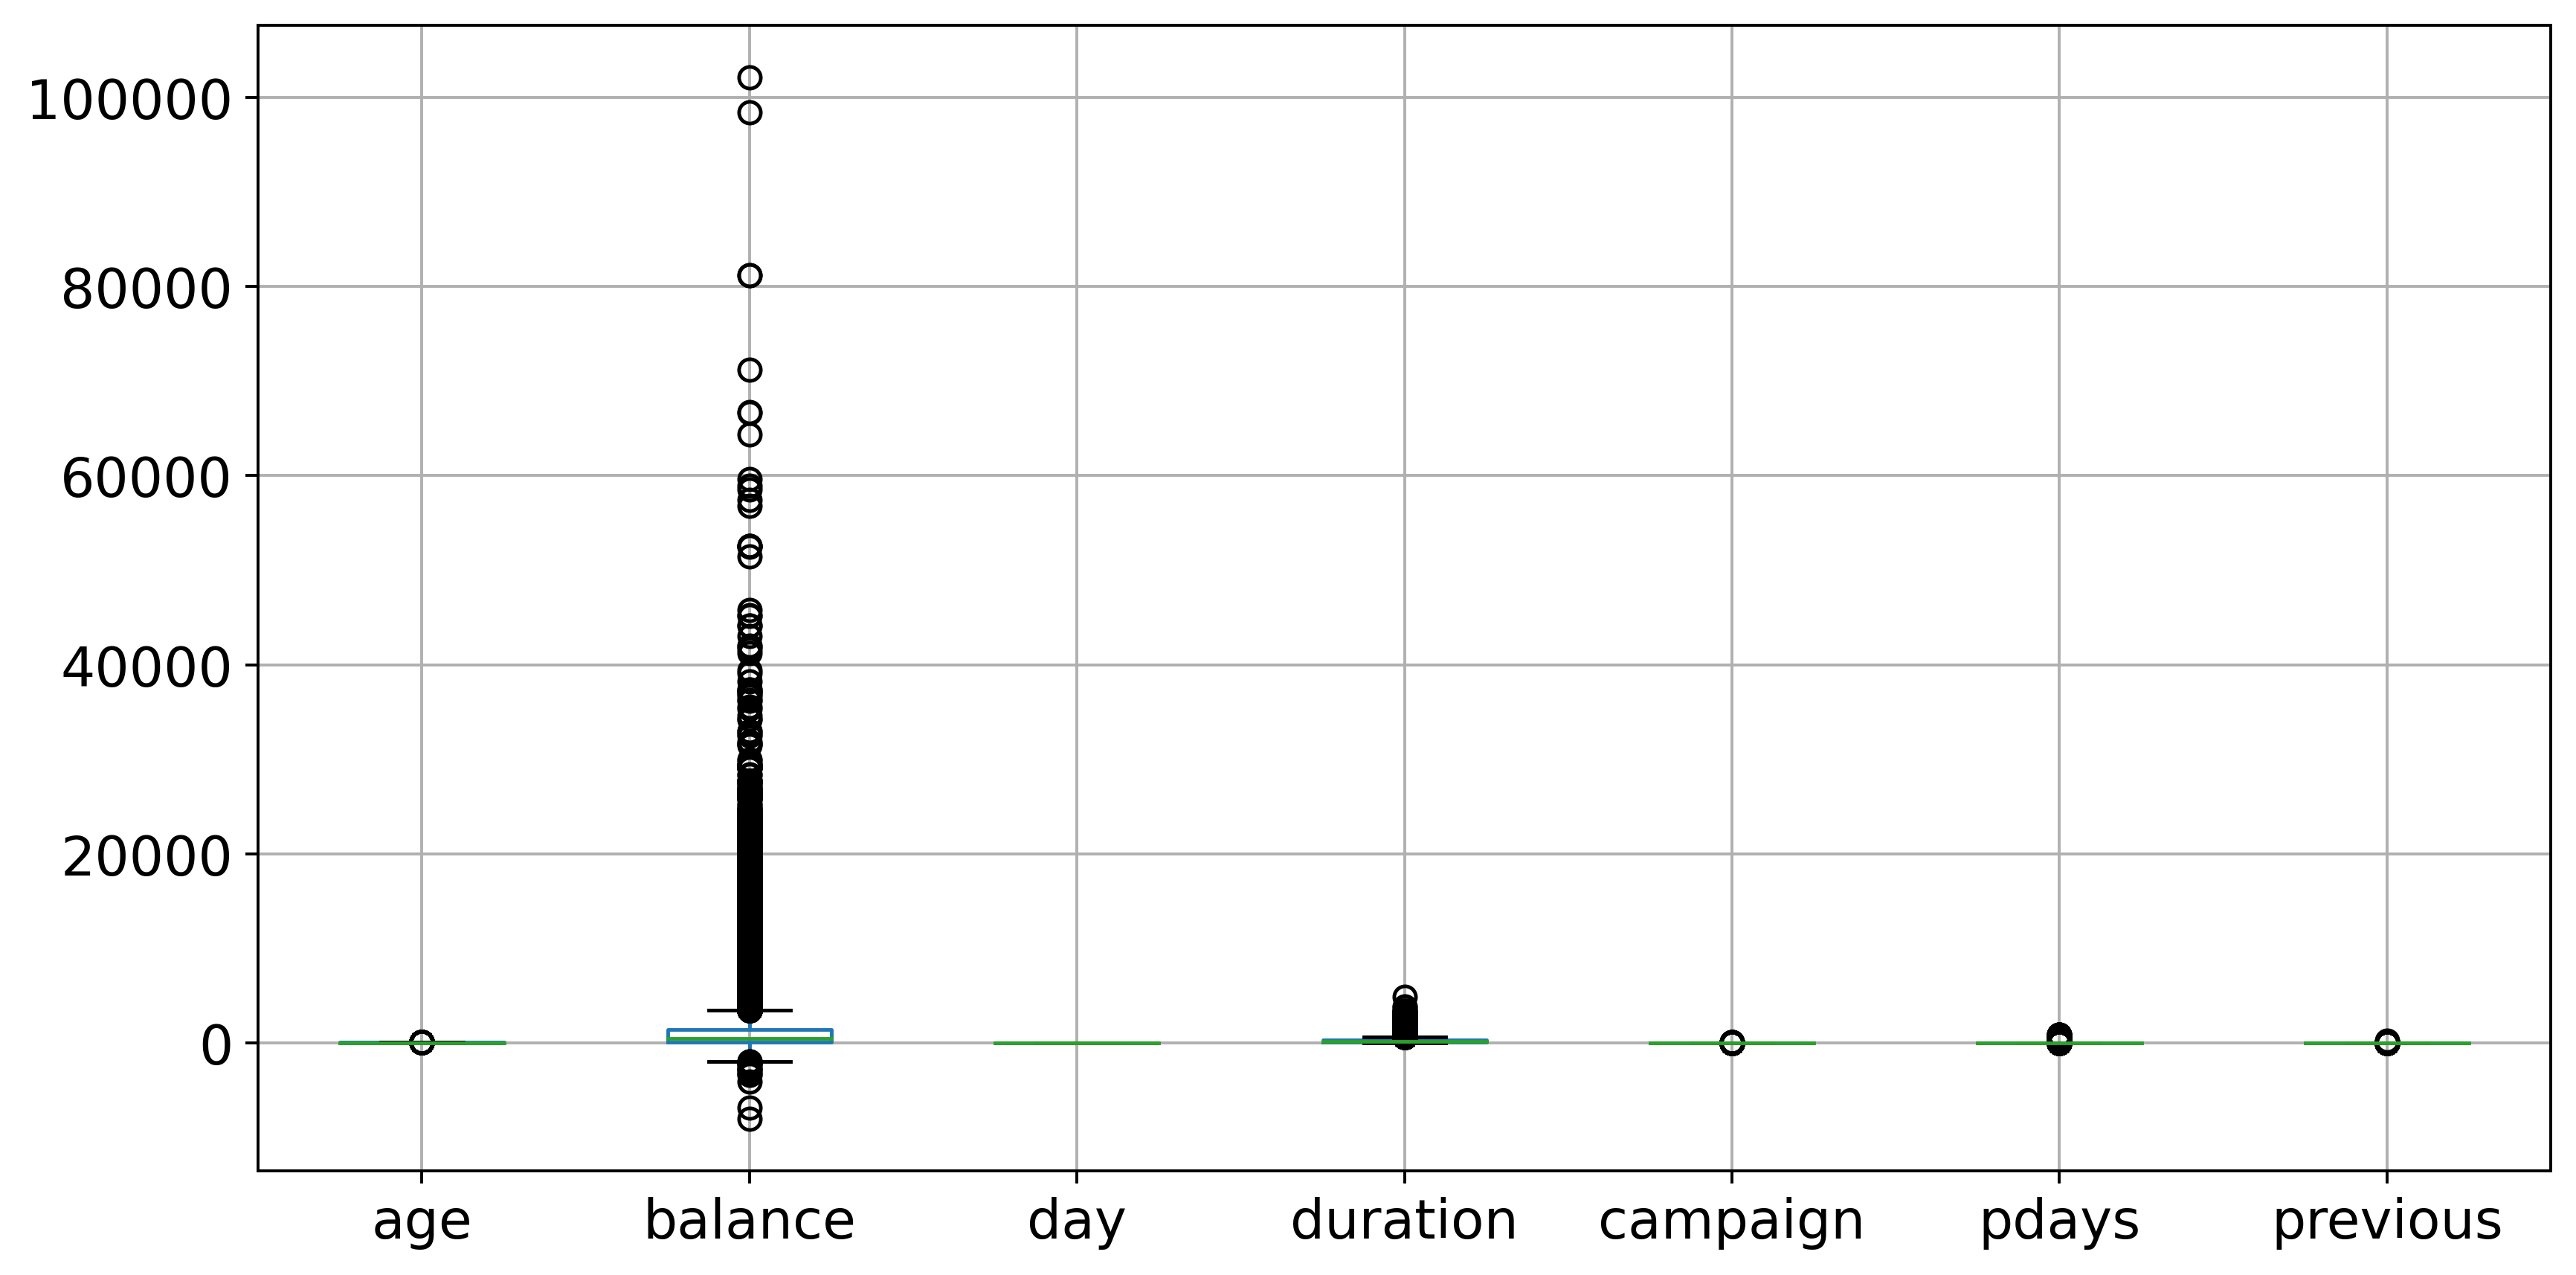

In [11]:
df.boxplot(figsize=(10,5),fontsize='15')
plt.tight_layout()

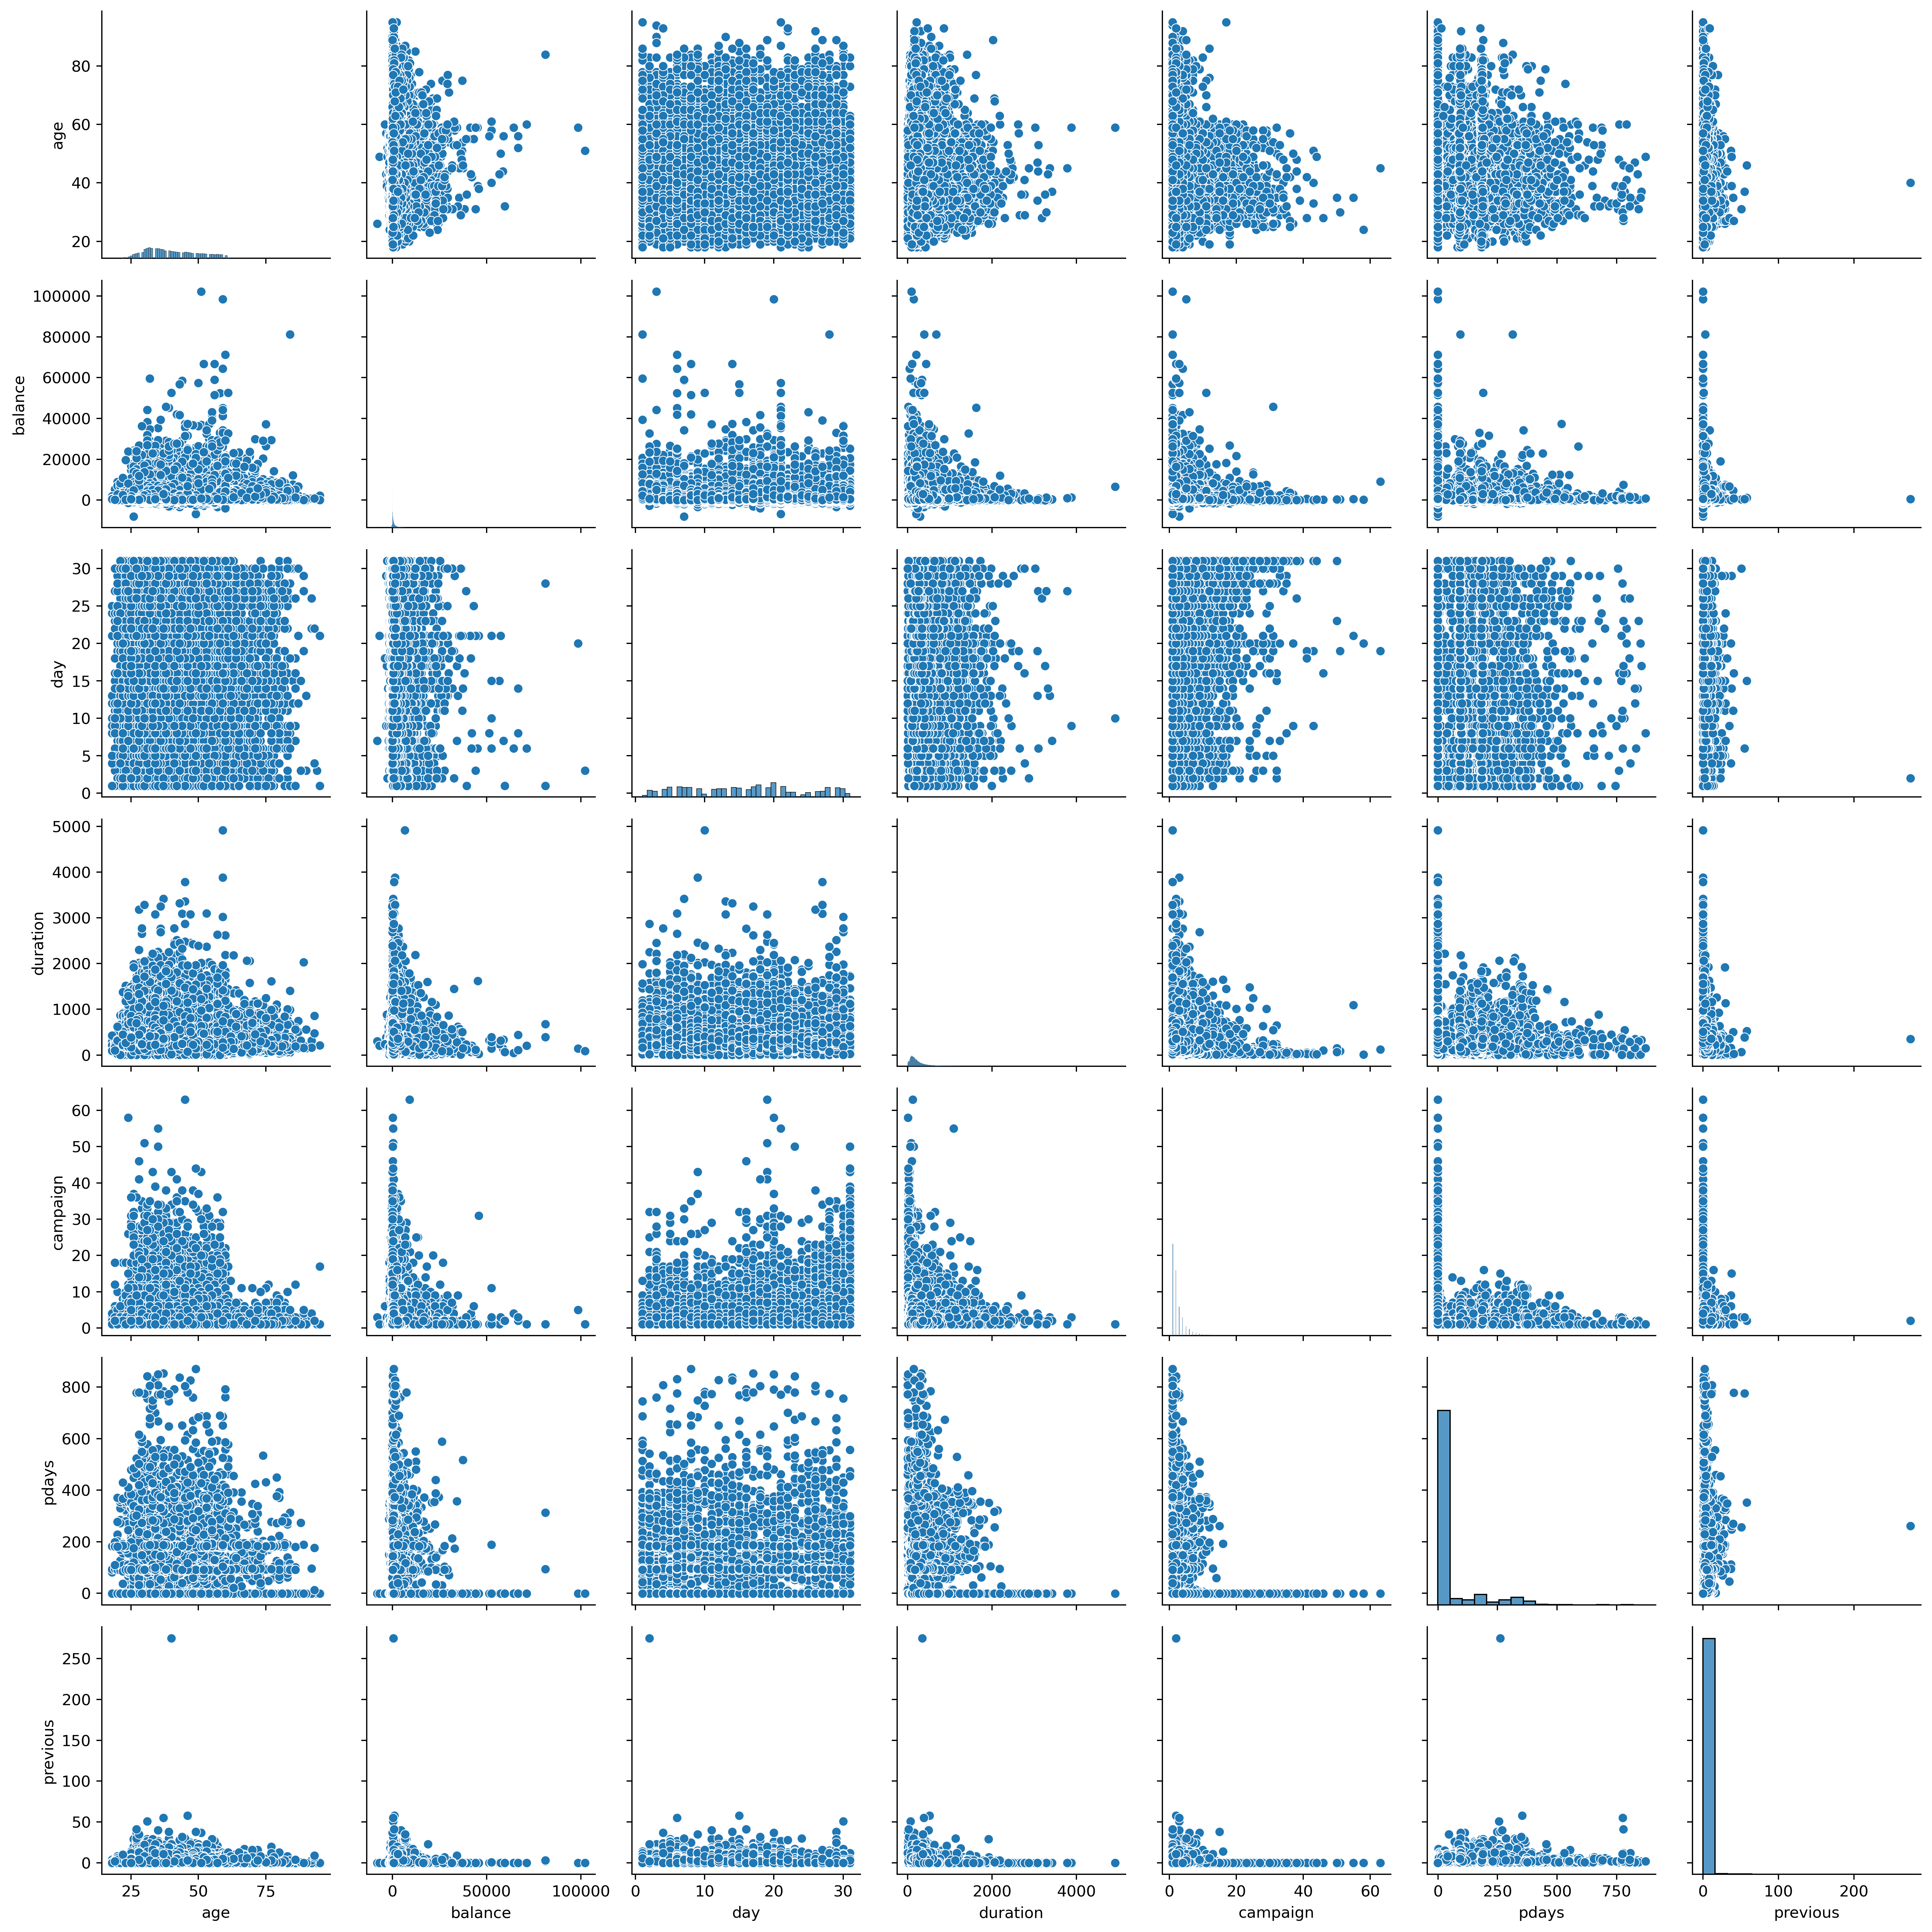

In [12]:
sns.pairplot(data=df)
plt.tight_layout()

<AxesSubplot:>

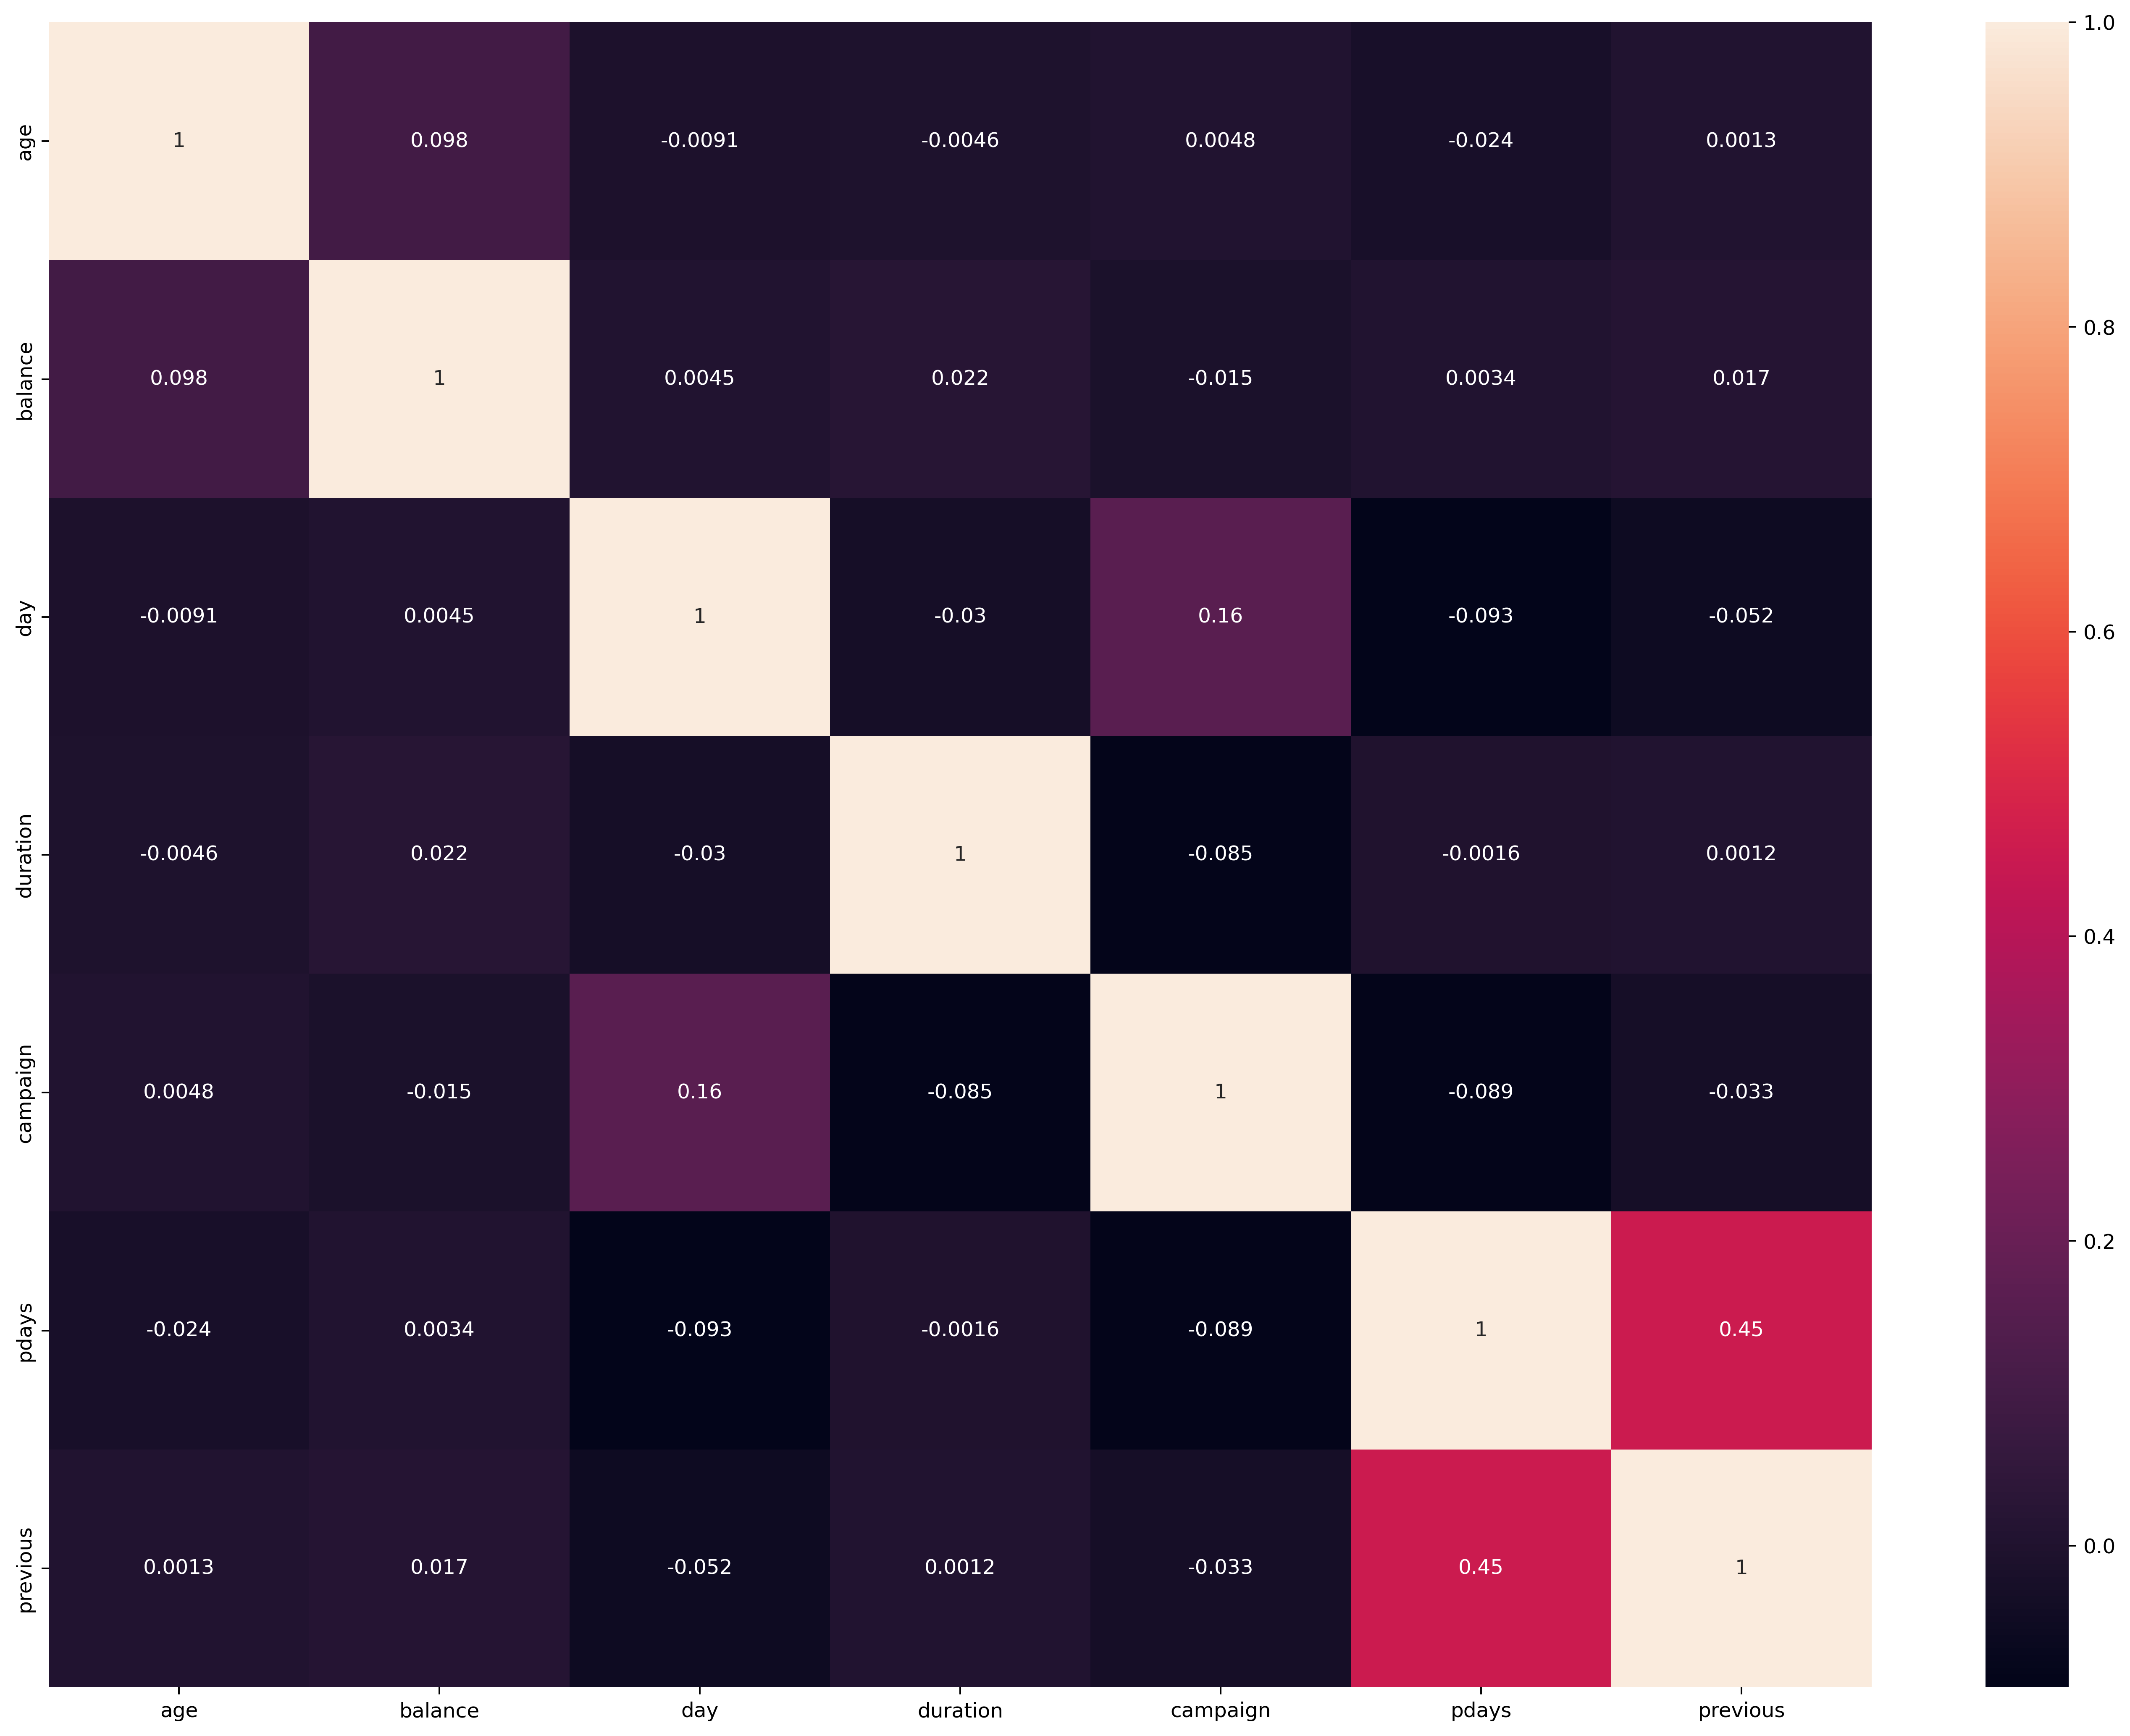

In [13]:
sns.heatmap(df.corr(),annot=True)

## Converting categorical column in numerical 

In [14]:
df.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no

### Converting Job Data to Numerical Data

In [15]:
df['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [16]:
df['job'].replace(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'],[0,1,2,3,4,5,6,7,8,9,10,11],inplace=True)

### Converting Marital Data to Numerical Data

In [17]:
df['marital'].unique()

array(['married', 'single', 'divorced'], dtype=object)

In [18]:
df['marital'].replace(['married', 'single', 'divorced'],[1,2,3],inplace=True)

### Converting education Data to Numerical Data

In [19]:
df['education'].unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [20]:
df['education'].replace(['tertiary', 'secondary', 'unknown', 'primary'],[1,2,3,4],inplace=True)

### Converting default,housing and loan  Data to Numerical Data

In [21]:
df['default'].unique(),df['housing'].unique(),df['loan'].unique()

(array(['no', 'yes'], dtype=object),
 array(['yes', 'no'], dtype=object),
 array(['no', 'yes'], dtype=object))

In [22]:
df['default'].replace(['no', 'yes'],[0,1],inplace=True)

In [23]:
df['housing'].replace(['no', 'yes'],[0,1],inplace=True)

In [24]:
df['loan'].replace(['no', 'yes'],[0,1],inplace=True)
df

age  job  marital  education  default  balance  housing  loan  \
0       58    0        1          1        0     2143        1     0   
1       44    1        2          2        0       29        1     0   
2       33    2        1          2        0        2        1     1   
3       47    3        1          3        0     1506        1     0   
4       33    4        2          3        0        1        0     0   
...    ...  ...      ...        ...      ...      ...      ...   ...   
45206   51    1        1          1        0      825        0     0   
45207   71    5        3          4        0     1729        0     0   
45208   72    5        1          2        0     5715        0     0   
45209   57    3        1          2        0      668        0     0   
45210   37    2        1          2        0     2971        0     0   

         contact  day month  duration  campaign  pdays  previous poutcome    y  
0        unknown    5   may       261         1     -1         0  unknown   no  
1        unknown    5   may       151         1     -1         0  unknown   no  
2        unknown    5   may        76         1     -1         0  unknown   no  
3        unknown    5   may        92         1     -1         0  unknown   no  
4        unknown    5   may       198         1     -1         0  unknown   no  
...          ...  ...   ...       ...       ...    ...       ...      ...  ...  
45206   cellular   17   nov       977         3     -1         0  unknown  yes  
45207   cellular   17   nov       456         2     -1         0  unknown  yes  
45208   cellular   17   nov      1127         5    184         3  success  yes  
45209  telephone   17   nov       508         4     -1         0  unknown   no  
45210   cellular   17   nov       361         2    188        11    other   no  

[45211 rows x 17 columns]

### Converting contact   Data to Numerical Data

In [25]:
df['contact'].unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

In [26]:
df['contact'].replace(['unknown', 'cellular', 'telephone'],[0,1,2],inplace=True)

### Converting Month  Data to Numerical Data

In [27]:
df['month'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [28]:
df['month'].replace(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'],[1,2,3,4,5,6,7,8,9,10,11,12],inplace=True)

### Converting Month  Data to Numerical Data

In [29]:
df['poutcome'].unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

In [30]:
df['poutcome'].replace(['unknown', 'failure', 'other', 'success'],[0,1,2,3],inplace=True)

### Converting Y column  to Numerical Data

In [31]:
df['y'].unique()

array(['no', 'yes'], dtype=object)

In [32]:
df['y'].replace(['no', 'yes'],[0,1],inplace=True)

In [33]:
df

age  job  marital  education  default  balance  housing  loan  contact  \
0       58    0        1          1        0     2143        1     0        0   
1       44    1        2          2        0       29        1     0        0   
2       33    2        1          2        0        2        1     1        0   
3       47    3        1          3        0     1506        1     0        0   
4       33    4        2          3        0        1        0     0        0   
...    ...  ...      ...        ...      ...      ...      ...   ...      ...   
45206   51    1        1          1        0      825        0     0        1   
45207   71    5        3          4        0     1729        0     0        1   
45208   72    5        1          2        0     5715        0     0        1   
45209   57    3        1          2        0      668        0     0        2   
45210   37    2        1          2        0     2971        0     0        1   

       day  month  duration  campaign  pdays  previous  poutcome  y  
0        5      1       261         1     -1         0         0  0  
1        5      1       151         1     -1         0         0  0  
2        5      1        76         1     -1         0         0  0  
3        5      1        92         1     -1         0         0  0  
4        5      1       198         1     -1         0         0  0  
...    ...    ...       ...       ...    ...       ...       ... ..  
45206   17      6       977         3     -1         0         0  1  
45207   17      6       456         2     -1         0         0  1  
45208   17      6      1127         5    184         3         3  1  
45209   17      6       508         4     -1         0         0  0  
45210   17      6       361         2    188        11         2  0  

[45211 rows x 17 columns]

# spilit the data into x and y

In [34]:
x = df.iloc[:,:-1]
y = df['y']

# Standardization

In [35]:
from sklearn.preprocessing import StandardScaler

In [36]:
sc = StandardScaler()

x = pd.DataFrame(sc.fit_transform(x),columns=x.columns)

x

age       job   marital  education  default   balance   housing  \
0      1.606965 -1.138083 -0.740666  -1.083560 -0.13549  0.256419  0.893915   
1      0.288529 -0.815326  0.702458  -0.051543 -0.13549 -0.437895  0.893915   
2     -0.747384 -0.492570 -0.740666  -0.051543 -0.13549 -0.446762  0.893915   
3      0.571051 -0.169813 -0.740666   0.980475 -0.13549  0.047205  0.893915   
4     -0.747384  0.152944  0.702458   0.980475 -0.13549 -0.447091 -1.118674   
...         ...       ...       ...        ...      ...       ...       ...   
45206  0.947747 -0.815326 -0.740666  -1.083560 -0.13549 -0.176460 -1.118674   
45207  2.831227  0.475700  2.145583   2.012493 -0.13549  0.120447 -1.118674   
45208  2.925401  0.475700 -0.740666  -0.051543 -0.13549  1.429593 -1.118674   
45209  1.512791 -0.169813 -0.740666  -0.051543 -0.13549 -0.228024 -1.118674   
45210 -0.370689 -0.492570 -0.740666  -0.051543 -0.13549  0.528364 -1.118674   

           loan   contact       day     month  duration  campaign     pdays  \
0     -0.436803 -1.412108 -1.298476 -0.924841  0.011016 -0.569351 -0.411453   
1     -0.436803 -1.412108 -1.298476 -0.924841 -0.416127 -0.569351 -0.411453   
2      2.289359 -1.412108 -1.298476 -0.924841 -0.707361 -0.569351 -0.411453   
3     -0.436803 -1.412108 -1.298476 -0.924841 -0.645231 -0.569351 -0.411453   
4     -0.436803 -1.412108 -1.298476 -0.924841 -0.233620 -0.569351 -0.411453   
...         ...       ...       ...       ...       ...       ...       ...   
45206 -0.436803  0.406931  0.143418  0.647631  2.791329  0.076230 -0.411453   
45207 -0.436803  0.406931  0.143418  0.647631  0.768224 -0.246560 -0.411453   
45208 -0.436803  0.406931  0.143418  0.647631  3.373797  0.721811  1.436189   
45209 -0.436803  2.225971  0.143418  0.647631  0.970146  0.399020 -0.411453   
45210 -0.436803  0.406931  0.143418  0.647631  0.399328 -0.246560  1.476138   

       previous  poutcome  
0     -0.251940 -0.415287  
1     -0.251940 -0.415287  
2     -0.251940 -0.415287  
3     -0.251940 -0.415287  
4     -0.251940 -0.415287  
...         ...       ...  
45206 -0.251940 -0.415287  
45207 -0.251940 -0.415287  
45208  1.050473  3.879866  
45209 -0.251940 -0.415287  
45210  4.523577  2.448149  

[45211 rows x 16 columns]

# Spliting the data into Training and testing Dataset 

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,train_size=0.20,random_state=1)

## Model

In [39]:
from sklearn.linear_model import LogisticRegression

In [40]:
lg = LogisticRegression()

lg.fit(xtrain,ytrain)

ypred = lg.predict(xtest)

## Evaluting the model 

In [41]:
from sklearn.metrics import classification_report,confusion_matrix

In [42]:
print('Actual Y: ', ytest[:25].values)
print('Predict Y:', ypred[:25])

Actual Y:  [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Predict Y: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [43]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94     31944
           1       0.64      0.29      0.40      4225

    accuracy                           0.90     36169
   macro avg       0.78      0.64      0.67     36169
weighted avg       0.88      0.90      0.88     36169



- We have accuracy of 90% which is fine but are recall value is very low we need to incress it, as per are problem statement.

In [44]:
confusion_matrix(ytest,ypred)

array([[31246,   698],
       [ 2983,  1242]], dtype=int64)

Text(774.5277777777777, 0.5, 'Predicted Values')

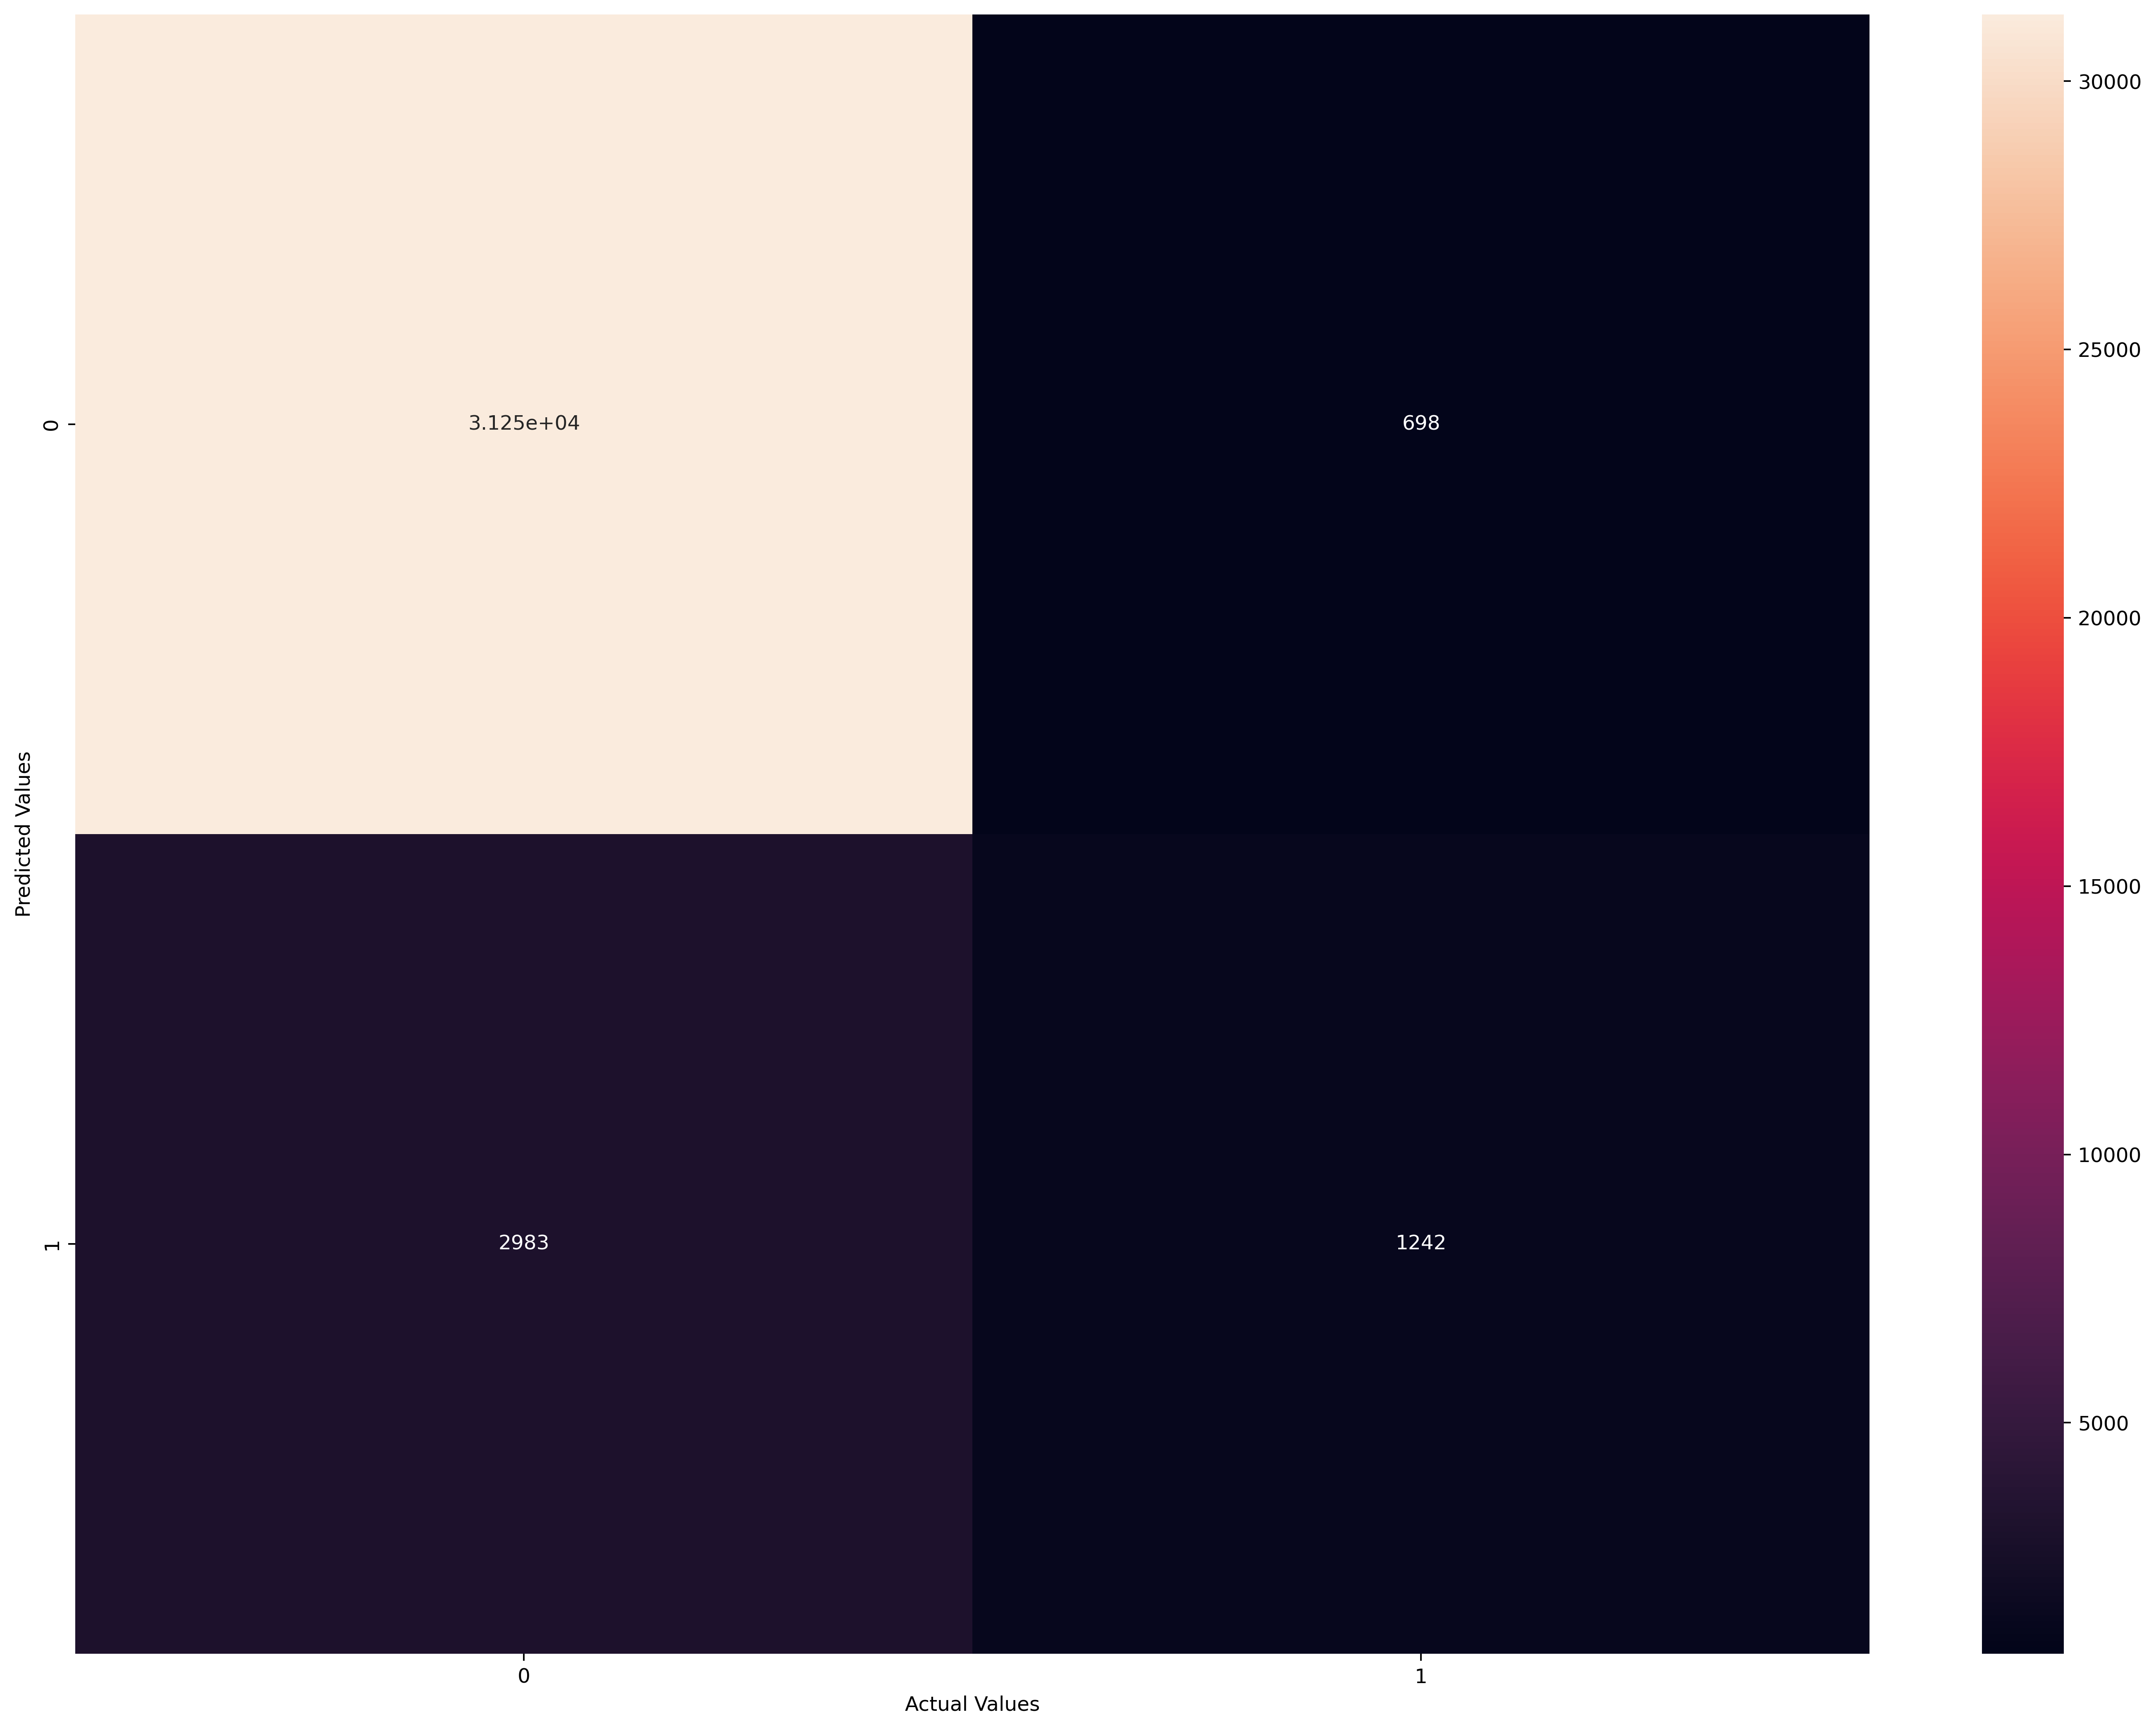

In [45]:
sns.heatmap(confusion_matrix(ytest,ypred), annot = True, fmt='.4g')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

In [46]:
lg.predict_proba(xtest)

array([[0.98693136, 0.01306864],
       [0.96712194, 0.03287806],
       [0.59714353, 0.40285647],
       ...,
       [0.88827844, 0.11172156],
       [0.83660995, 0.16339005],
       [0.72454511, 0.27545489]])

In [47]:
proba = lg.predict_proba(xtest)[:,1]

proba

array([0.01306864, 0.03287806, 0.40285647, ..., 0.11172156, 0.16339005,
       0.27545489])

# Plotting the Roc- Auc curve 

In [48]:

from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score

In [49]:
auc = roc_auc_score(ytest,proba)

auc

0.8886794049349678

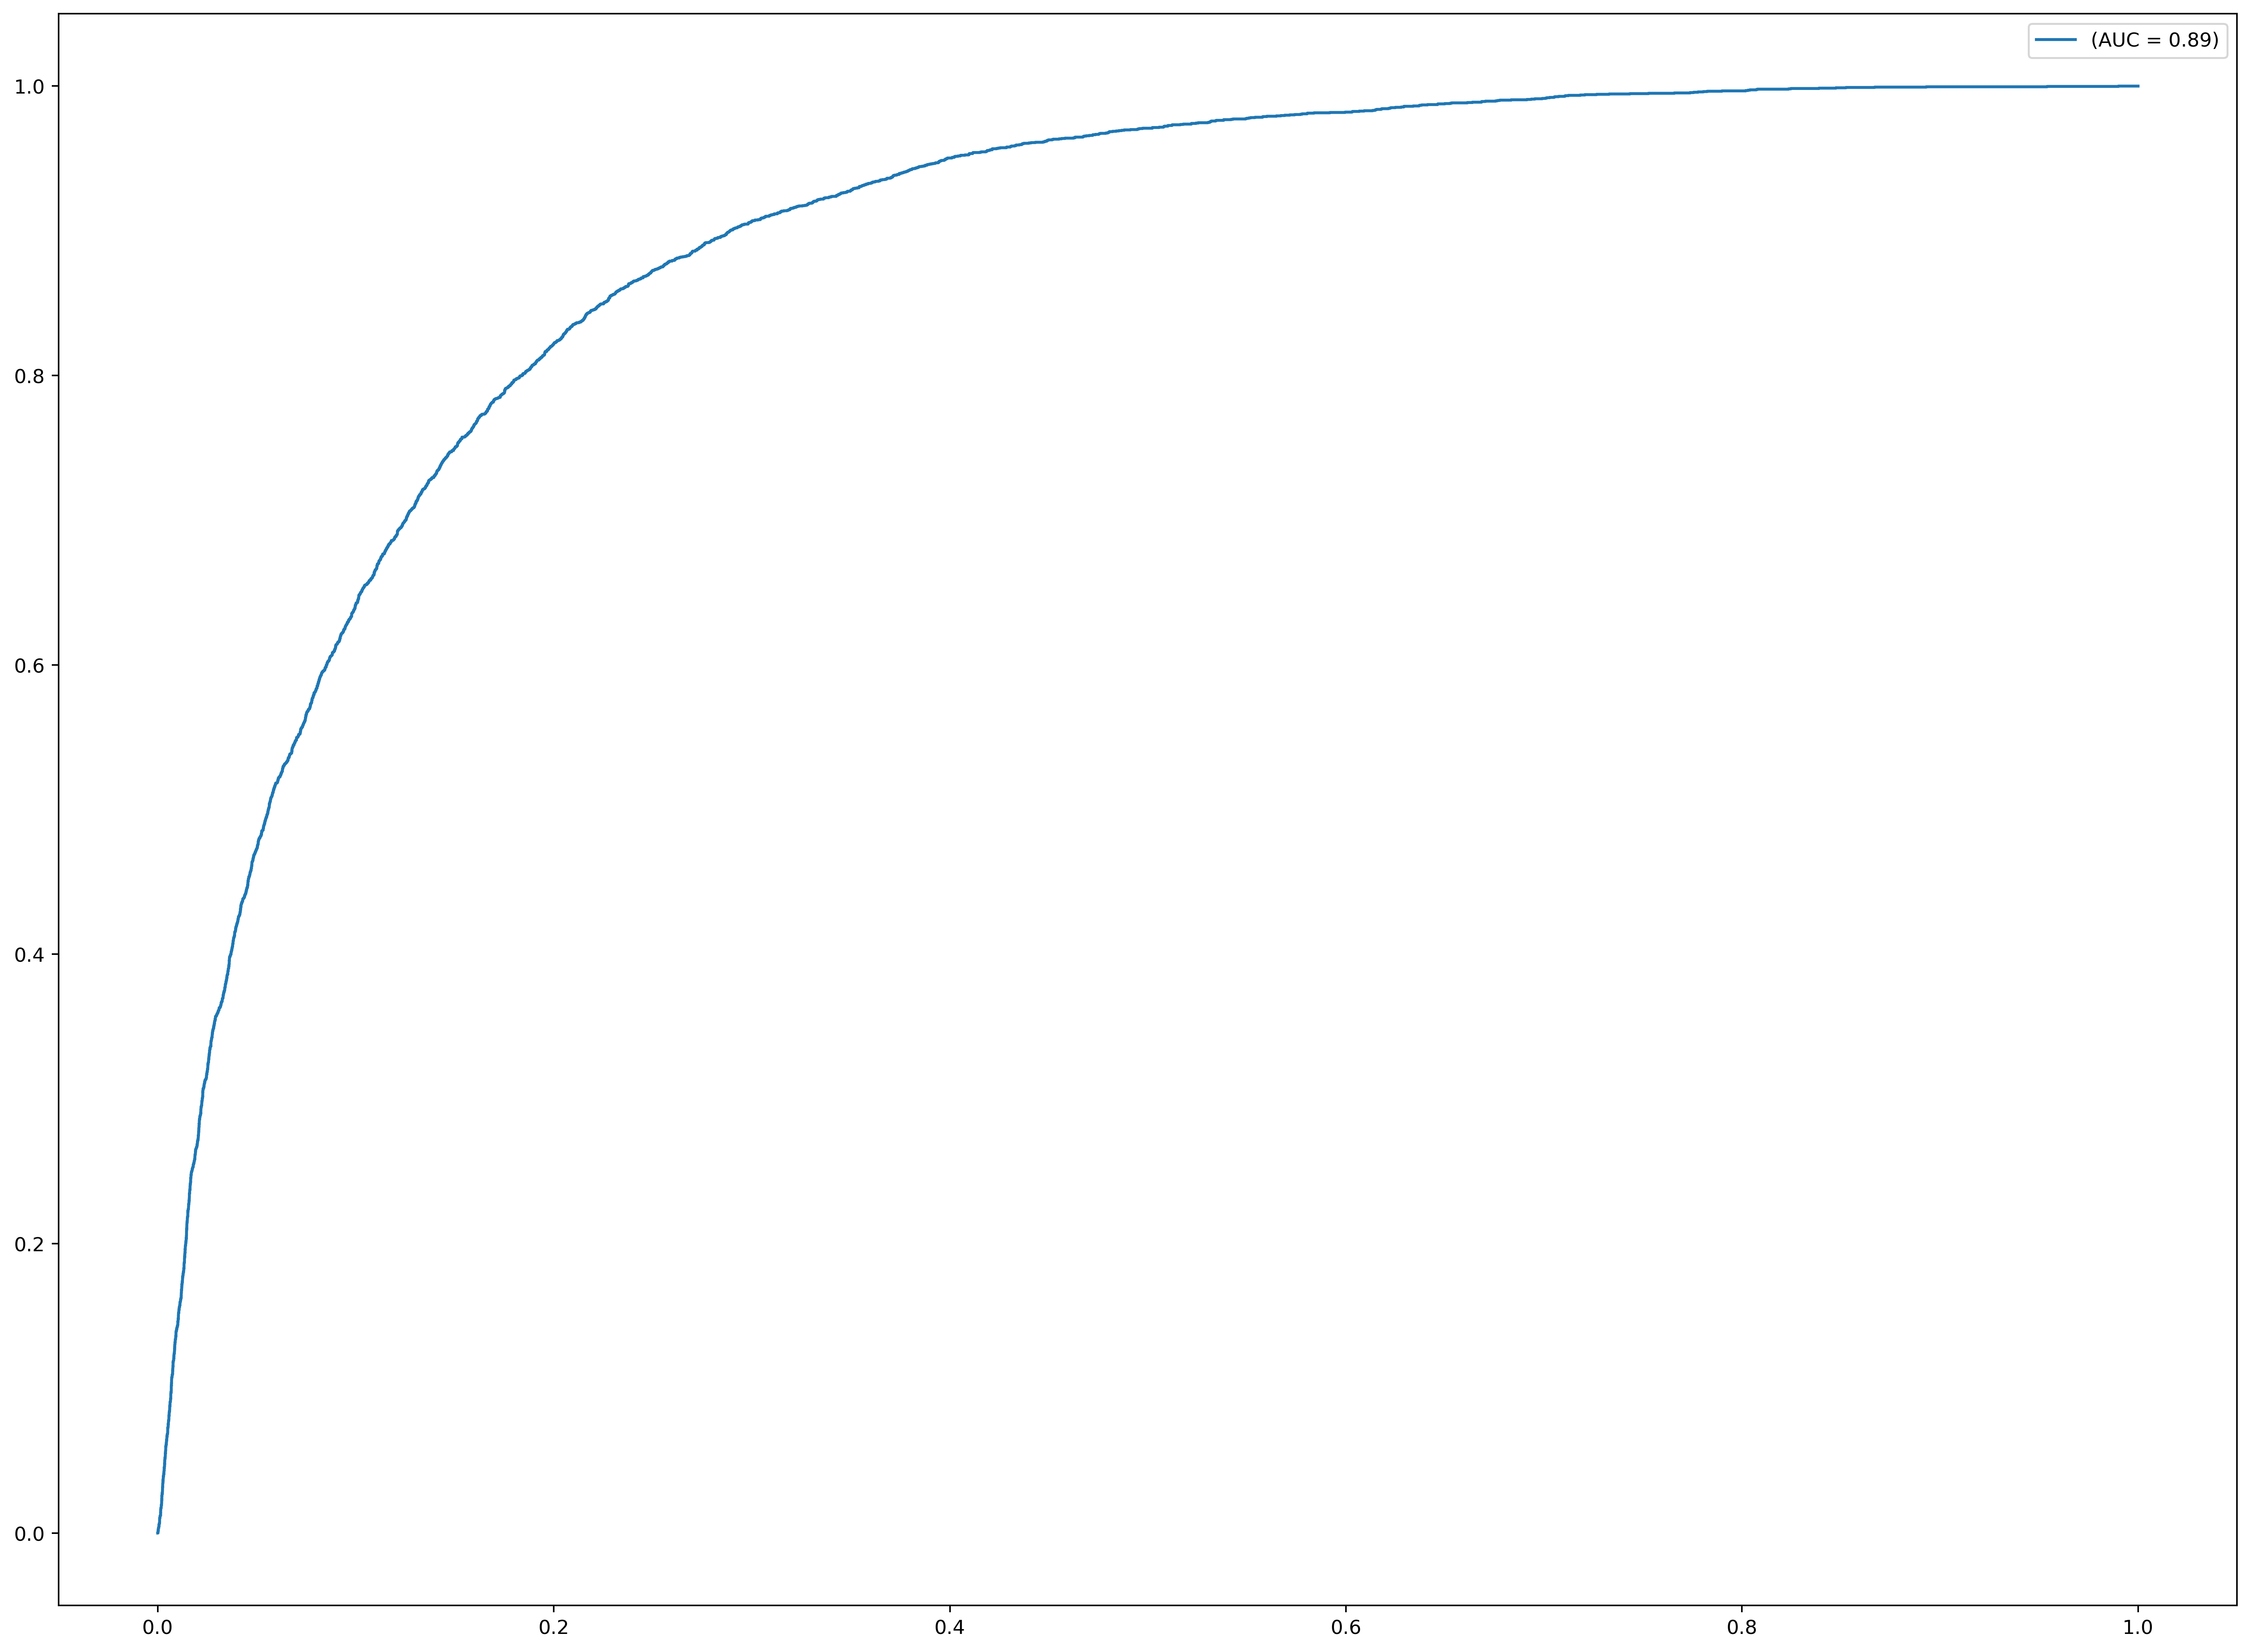

In [50]:
fpr,tpr, threshold = roc_curve(ytest,proba)

plt.plot(fpr,tpr,label = '(AUC = %0.2f)'%auc)
plt.legend()

In [51]:
def Optimal_Threshold(proba,ytest,ypred):
    accuracy = []

    for i in threshold:
        ypred = np.where(proba>i,1,0)
        accuracy.append(accuracy_score(ytest,ypred))

        final_threshold = pd.concat([pd.Series(threshold),pd.Series(accuracy)], axis=1)
        final_threshold.columns = ['Threshold','Accuracy']

        threshold_value = final_threshold.sort_values(by='Accuracy', ascending=False).iloc[0,0]
    
    return threshold_value,final_threshold.sort_values(by='Accuracy', ascending=False)

In [52]:
Optimal_Threshold(proba,ytest,ypred)

(0.4361137241454035,
       Threshold  Accuracy
 1079   0.436114  0.899223
 1072   0.438429  0.899223
 1073   0.438343  0.899223
 1078   0.436755  0.899195
 1071   0.438550  0.899195
 ...         ...       ...
 5242   0.007498  0.157317
 5243   0.007497  0.157289
 5244   0.003223  0.125522
 5245   0.003214  0.125494
 5246   0.000004  0.116840
 
 [5247 rows x 2 columns])

In [53]:
from sklearn.preprocessing import binarize

In [54]:
new_ypred = binarize([proba], threshold = Optimal_Threshold(proba,ytest,ypred)[0])[0]

new_ypred

array([0., 0., 0., ..., 0., 0., 0.])

In [55]:
print(classification_report(ytest,new_ypred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94     31944
           1       0.62      0.35      0.45      4225

    accuracy                           0.90     36169
   macro avg       0.77      0.66      0.70     36169
weighted avg       0.88      0.90      0.89     36169



# Kfold Cross validation 

In [57]:
from sklearn.model_selection import train_test_split,KFold,cross_val_score

In [58]:
kfold = KFold(n_splits=10,shuffle=True,random_state=10)

In [59]:
score = cross_val_score(LogisticRegression(),x,y,cv=kfold)

In [60]:
score

array([0.89761168, 0.89847379, 0.90533068, 0.89781022, 0.89758903,
       0.90400354, 0.90289759, 0.90356116, 0.89205928, 0.88896262])

In [63]:
score.mean()*100

89.88299577156327